> **Hint**: Welcome to the Stat410,Stat415 (Introduction to Data Science) project! You will find some Notes in quoted sections like this to help organize your project for submission. First things, you might want to double-click this cell and change the title so that it reflects your dataset and your Work.

# Data Science Project 2024:clean ,visualize, make Desriptive Statistics,and also Answer your Questions about Data (type here you dataset Name!)

## Steps that you should follow
<ul>
<li><a href="#Dataset Information">Dataset Information</a></li>
<li><a href="#Gat">Gathering</a></li>
<li><a href="#Asse">Assessing</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#Comment">Type Comment for Every Graph or Plot</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.


In [115]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot  as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import scipy.stats as stats

<a id='wrangling'></a>
## Data Wrangling

>  In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [14]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing data.

path ="C:\\Users\\Dell\\Downloads\\online_teaching_data.csv"

file=pd.read_csv(path,header=0)
summary_stats = file.describe()
print(summary_stats)

#probelms I face 
# student id in number12 is 4 which is wrong turn it into 12 
#the total posts column doesn't equal to the actual total of the columns of posts ,so I deleted it and I can't create a new one because of the  null
#once I noticed in excel so I changed it 
#instead of skills numbers replace with their actual names


       student_id  helpful_post  nice_code_post  collaborative_post  \
count   71.000000     71.000000       70.000000           71.000000   
mean    35.000000      4.070423        7.400000           11.704225   
std     20.639767      6.845904       12.630077           14.079767   
min      0.000000      0.000000        0.000000            0.000000   
25%     17.500000      0.000000        0.000000            1.500000   
50%     35.000000      3.000000        2.500000            7.000000   
75%     52.500000      6.000000       12.750000           16.500000   
max     70.000000     53.000000       90.000000           89.000000   

       confused_post  creative_post   bad_post  amazing_post    timeonline  \
count      71.000000      70.000000  71.000000     71.000000     68.000000   
mean        0.549296      18.500000   0.056338     19.323944  10055.161765   
std         1.350013      22.333279   0.287219     22.301681   9939.874662   
min         0.000000       0.000000   0.000000  

In [117]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   student_id                   71 non-null     int64  
 1   helpful_post                 71 non-null     int64  
 2   nice_code_post               70 non-null     float64
 3   collaborative_post           71 non-null     int64  
 4   confused_post                71 non-null     int64  
 5   creative_post                70 non-null     float64
 6   bad_post                     71 non-null     int64  
 7   amazing_post                 71 non-null     int64  
 8   timeonline                   68 non-null     float64
 9   Critical_problemSolving      71 non-null     object 
 10  Creativity                   71 non-null     object 
 11  Self_Learning                71 non-null     object 
 12  Collaboration_selfDirection  71 non-null     object 
 13  Social                

In [118]:
file.dtypes

student_id                       int64
helpful_post                     int64
nice_code_post                 float64
collaborative_post               int64
confused_post                    int64
creative_post                  float64
bad_post                         int64
amazing_post                     int64
timeonline                     float64
Critical_problemSolving         object
Creativity                      object
Self_Learning                   object
Collaboration_selfDirection     object
Social                          object
Approved                         int64
dtype: object

In [17]:
import pandas as pd 
import numpy as np
import seaborn as sns
path ="C:\\Users\\Dell\\Downloads\\online_teaching_data.csv"

file=pd.read_csv(path,header=0)

columns_to_convert = ['nice_code_post', 'creative_post']
file[columns_to_convert] = file[columns_to_convert].apply(pd.to_numeric, errors='coerce').astype('Int64')
columns_to_convertfloat = ['Critical_problemSolving', 'Creativity', 'Self_Learning', 'Collaboration_selfDirection', 'Social']

# Replace commas with dots and convert to float
for column in columns_to_convertfloat:
    file[column] = file[column].replace({',': '.'}, regex=True).astype(float)
#why I changed datatypes ? to be more specified and be able to create graphs easily and impute right numbers
#all posts turned into int no half a post is real ,all skills are float because it has fractions ,timeonline let it float 
file.dtypes
summary_stats2 = file.describe()
print(summary_stats2)

       student_id  helpful_post  nice_code_post  collaborative_post  \
count   71.000000     71.000000            70.0           71.000000   
mean    35.000000      4.070423             7.4           11.704225   
std     20.639767      6.845904       12.630077           14.079767   
min      0.000000      0.000000             0.0            0.000000   
25%     17.500000      0.000000             0.0            1.500000   
50%     35.000000      3.000000             2.5            7.000000   
75%     52.500000      6.000000           12.75           16.500000   
max     70.000000     53.000000            90.0           89.000000   

       confused_post  creative_post   bad_post  amazing_post    timeonline  \
count      71.000000           70.0  71.000000     71.000000     68.000000   
mean        0.549296           18.5   0.056338     19.323944  10055.161765   
std         1.350013      22.333279   0.287219     22.301681   9939.874662   
min         0.000000            0.0   0.000000  

In [12]:
file.head()

,student_id,helpful_post,nice_code_post,collaborative_post,confused_post,creative_post,bad_post,amazing_post,timeonline,Critical_problemSolving,Creativity,Self_Learning,Collaboration_selfDirection,Social,Approved
0,0,0,0,0,0,6,0,1,1600.0,2.1,2.4,3.5,3.6,1.7,0
1,1,0,0,1,0,2,0,3,592.0,0.3,0.3,0.0,0.1,0.2,0
2,2,4,3,9,0,16,1,8,1110.0,8.0,5.0,5.0,7.0,5.0,1
3,3,1,3,9,2,11,0,8,8651.0,6.0,5.0,4.0,6.0,4.0,1
4,4,6,15,28,0,50,0,45,NaN,8.7,9.0,6.5,10.0,8.8,1


In [13]:
missing_values=file.isnull().sum()
print(missing_values)

student_id                     0
helpful_post                   0
nice_code_post                 1
collaborative_post             0
confused_post                  0
creative_post                  1
bad_post                       0
amazing_post                   0
timeonline                     3
Critical_problemSolving        0
Creativity                     0
Self_Learning                  0
Collaboration_selfDirection    0
Social                         0
Approved                       0
dtype: int64


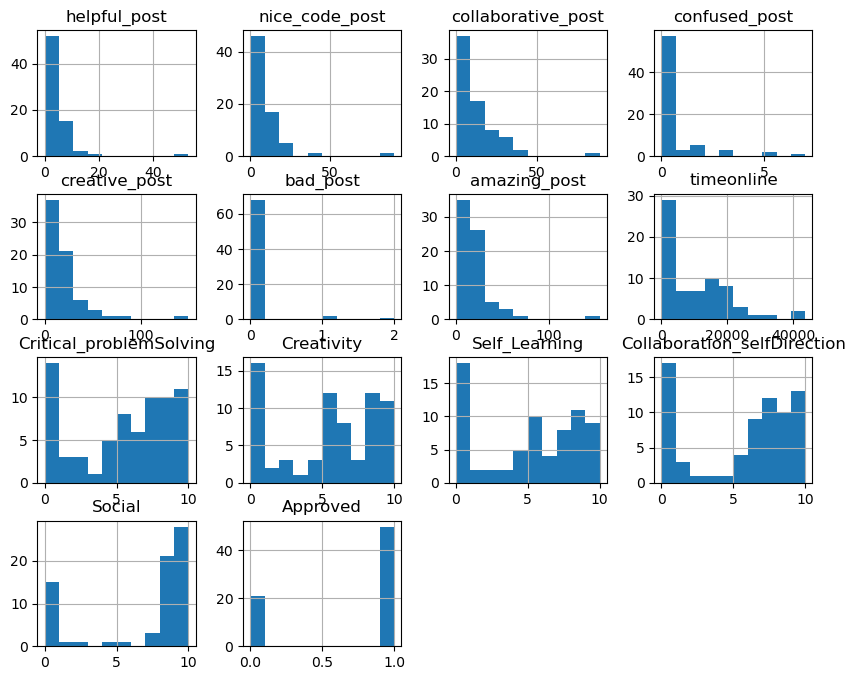

In [213]:

#seeing the distribution of all of them and boxplots to see the outliers 
columns_to_convertfloat = ['Critical_problemSolving', 'Creativity', 'Self_Learning', 'Collaboration_selfDirection', 'Social']

# Replace commas with dots and convert to float, handling missing values
for column in columns_to_convertfloat:
    file[column] = file[column].replace({',': '.'}, regex=True).astype(float)
columns_to_convert = ['nice_code_post', 'creative_post']
file[columns_to_convert] = file[columns_to_convert].apply(pd.to_numeric, errors='coerce').astype('Int64')
columns_to_convertfloat = ['Critical_problemSolving', 'Creativity', 'Self_Learning', 'Collaboration_selfDirection', 'Social']

# Replace commas with dots and convert to float, handling missing values
for column in columns_to_convertfloat:
    file[column] = file[column].replace({',': '.'}, regex=True).astype(float)
columns_to_plothist = file.drop(columns=['student_id'])
columns_to_plothist.hist(figsize=(10, 8))  # Adjust the figure size as needed
plt.show()

In [ ]:
#the missing values are dependent ,not normal,have outliers

> **Note that**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. 

> Make sure that you keep your reader informed on the steps that you are taking in your Analysis and Visualization. 
### Data Cleaning (Replace this with more specific notes!)

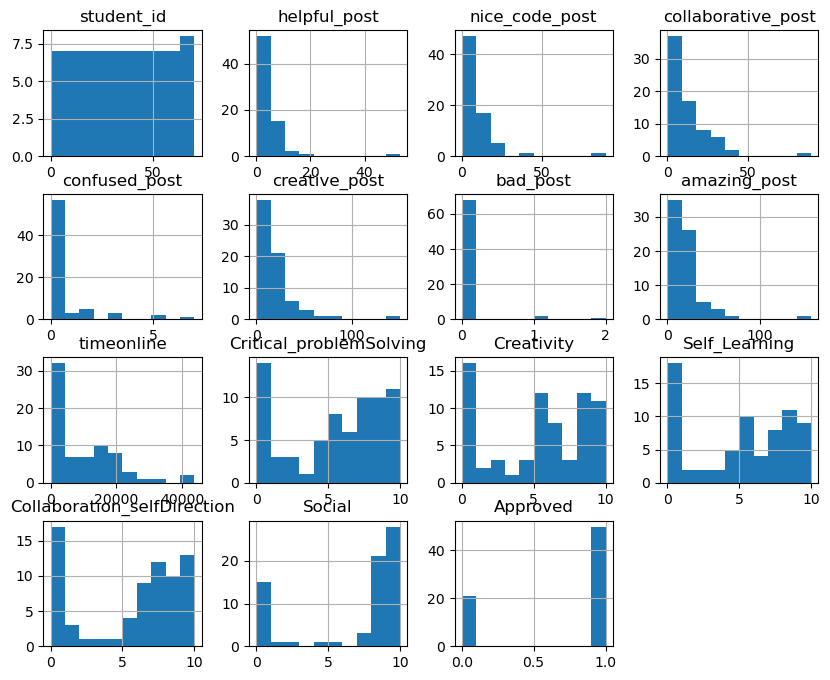

student_id                     0
helpful_post                   0
nice_code_post                 0
collaborative_post             0
confused_post                  0
creative_post                  0
bad_post                       0
amazing_post                   0
timeonline                     0
Critical_problemSolving        0
Creativity                     0
Self_Learning                  0
Collaboration_selfDirection    0
Social                         0
Approved                       0
dtype: int64

In [26]:
import matplotlib.pyplot as plt
columns_to_convertfloat = ['Critical_problemSolving', 'Creativity', 'Self_Learning', 'Collaboration_selfDirection', 'Social']

# Replace commas with dots and convert to float, handling missing values
for column in columns_to_convertfloat:
    file[column] = file[column].replace({',': '.'}, regex=True).astype(float)
    columns_to_convert = ['nice_code_post', 'creative_post']
file[columns_to_convert] = file[columns_to_convert].apply(pd.to_numeric, errors='coerce').astype('Int64')
file.fillna(0, inplace=True)
columns_to_plott = file
columns_to_plott.hist(figsize=(10, 8))  # Adjust the figure size as needed
plt.show()
file.head(7)
file.isnull().sum()


In [ ]:
#they are considered the same shapes as before so we kept the distributions of data
#if we fill with mode the same result 

In [ ]:
#adding a total column 

In [5]:
file['Total'] = file[['helpful_post','nice_code_post','collaborative_post','confused_post','creative_post','bad_post','amazing_post']].sum(axis=1)
file.head()

,student_id,helpful_post,nice_code_post,collaborative_post,confused_post,creative_post,bad_post,amazing_post,timeonline,Critical_problemSolving,Creativity,Self_Learning,Collaboration_selfDirection,Social,Approved,Total
0,0,0,0,0,0,6,0,1,1600.0,2.1,2.4,3.5,3.6,1.7,0,7
1,1,0,0,1,0,2,0,3,592.0,0.3,0.3,0.0,0.1,0.2,0,6
2,2,4,3,9,0,16,1,8,1110.0,8.0,5.0,5.0,7.0,5.0,1,41
3,3,1,3,9,2,11,0,8,8651.0,6.0,5.0,4.0,6.0,4.0,1,34
4,4,6,15,28,0,50,0,45,NaN,8.7,9.0,6.5,10.0,8.8,1,144



## Exploratory Data Analysis

>  Now that you've cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section , and then follow it up by looking at relationships between variables.

### Research Question 1 (Replace this header name!)

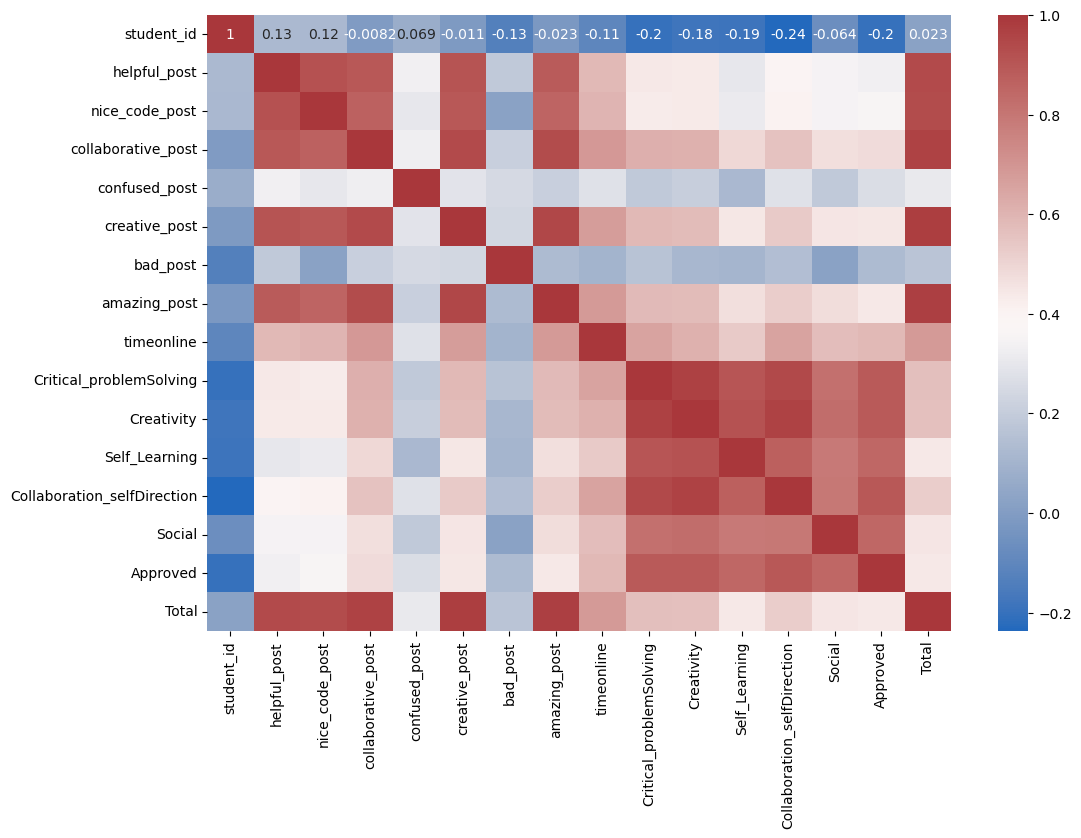

In [6]:
#how the correlation among variables to make a regression model?
columns_to_convertfloat = ['Critical_problemSolving', 'Creativity', 'Self_Learning', 'Collaboration_selfDirection', 'Social']

# Replace commas with dots and convert to float, handling missing values
for column in columns_to_convertfloat:
    file[column] = file[column].replace({',': '.'}, regex=True).astype(float)
    columns_to_convert = ['nice_code_post', 'creative_post']
file[columns_to_convert] = file[columns_to_convert].apply(pd.to_numeric, errors='coerce').astype('Int64')
file.head()
numeric_columns = file.select_dtypes(include=['number'])
correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='vlag')
plt.show()


In [ ]:
#the heatmap shows the all  linear correlation
#the skills are so correlated with each other which is unexpected 
#the posts with skills are  weak
#the posts with each other there is a sort of correlation(strong and above average)
#the confused and bad posts have weak relation with other posts because most of them are zeros and little numbers

### Research Question 2  (Replace this header name!)

In [2]:

# the reaction on posts

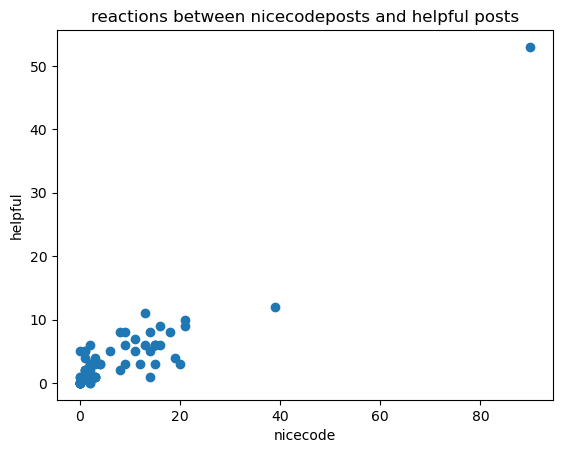

In [28]:
path ="C:\\Users\\Dell\\Downloads\\online_teaching_data.csv"
  
file=pd.read_csv(path,header=0)

nicecode=file['nice_code_post']
help=file['helpful_post']
plt.scatter(nicecode, help)

# Adding title and labels
plt.title('reactions between nicecodeposts and helpful posts')
plt.xlabel('nicecode')
plt.ylabel('helpful')

# Display the plot
plt.show()

In [ ]:
#as their correlation is string the number of reactions between them are simillar and can be linear

### Research Question 3  (Replace this header name!)

In [1]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to Answer

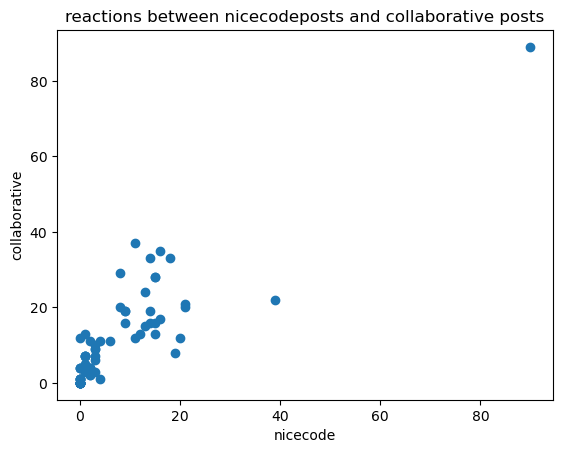

In [29]:
path ="C:\\Users\\Dell\\Downloads\\online_teaching_data.csv"
  
file=pd.read_csv(path,header=0)

nicecode2=file['nice_code_post']
coll=file['collaborative_post']
plt.scatter(nicecode,coll )

# Adding title and labels
plt.title('reactions between nicecodeposts and collaborative posts')
plt.xlabel('nicecode')
plt.ylabel('collaborative')

# Display the plot
plt.show()

### Research Question 4  (Replace this header name!)

In [4]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to Answer

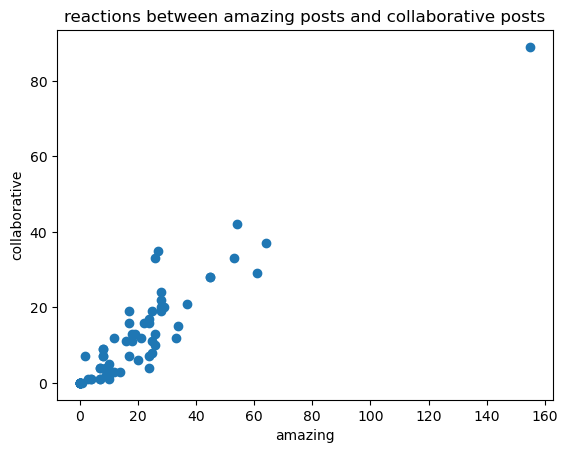

In [30]:
path ="C:\\Users\\Dell\\Downloads\\online_teaching_data.csv"
  
file=pd.read_csv(path,header=0)

amazing=file['amazing_post']
coll=file['collaborative_post']
plt.scatter(amazing,coll )

# Adding title and labels
plt.title('reactions between amazing posts and collaborative posts')
plt.xlabel('amazing')
plt.ylabel('collaborative')

# Display the plot
plt.show()

In [ ]:
#the 3 graphs are all conected at the same topic

### Research Question 5 (Replace this header name!)

In [5]:

#the students that has the highest skills and the highest screen time

In [34]:
file.idxmax()

student_id                     70
helpful_post                   66
nice_code_post                 66
collaborative_post             66
confused_post                   5
creative_post                  66
bad_post                       19
amazing_post                   66
timeonline                      8
Critical_problemSolving        13
Creativity                     21
Self_Learning                  14
Collaboration_selfDirection    27
Social                         31
Approved                        2
dtype: int64

In [35]:
file.max()

student_id                          70
helpful_post                        53
nice_code_post                    90.0
collaborative_post                  89
confused_post                        7
creative_post                    150.0
bad_post                             2
amazing_post                       155
timeonline                     43612.0
Critical_problemSolving            9,3
Creativity                         9,3
Self_Learning                        9
Collaboration_selfDirection        9,7
Social                             9,8
Approved                             1
dtype: object

### Research Question 6 (Replace this header name!)

In [5]:
#the students that has the lowest skills and the lowest screen time


In [36]:
file.idxmin()

student_id                      0
helpful_post                    0
nice_code_post                  0
collaborative_post              0
confused_post                   0
creative_post                  28
bad_post                        0
amazing_post                   28
timeonline                     30
Critical_problemSolving        28
Creativity                     28
Self_Learning                   1
Collaboration_selfDirection    30
Social                         28
Approved                        0
dtype: int64

In [37]:
file.min()

student_id                       0
helpful_post                     0
nice_code_post                 0.0
collaborative_post               0
confused_post                    0
creative_post                  0.0
bad_post                         0
amazing_post                     0
timeonline                     0.0
Critical_problemSolving          0
Creativity                       0
Self_Learning                    0
Collaboration_selfDirection      0
Social                           0
Approved                         0
dtype: object

### Research Question 7 (Replace this header name!)

In [5]:
#the trend of reactions and skills 


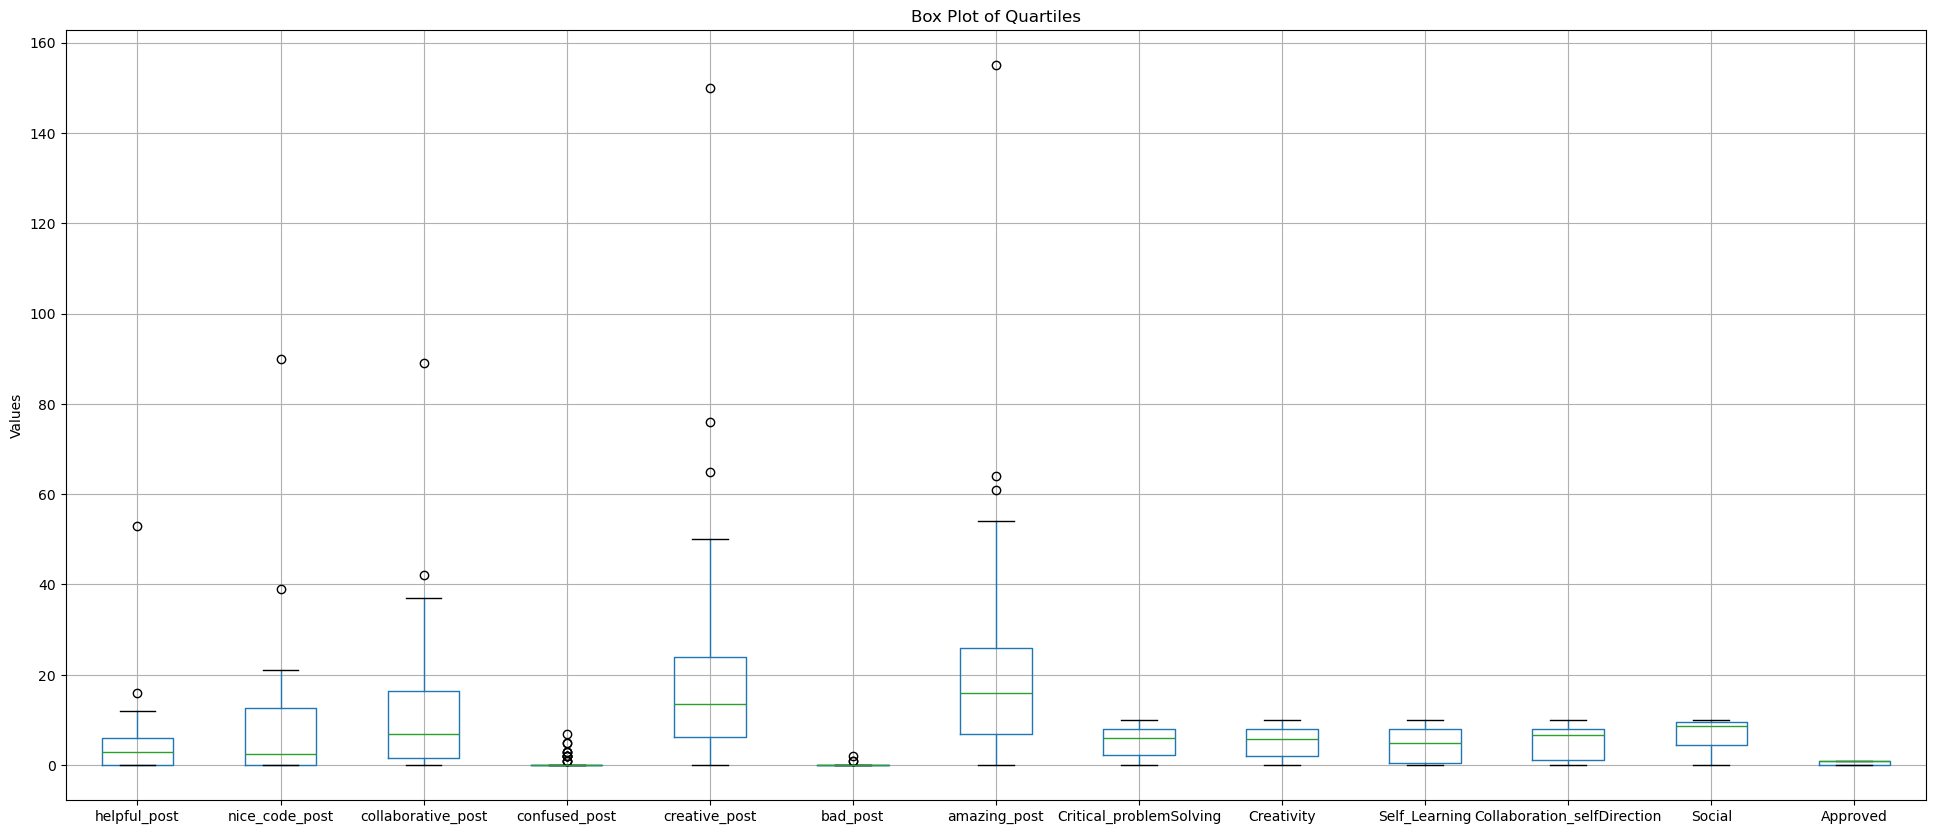

In [3]:
import matplotlib.pyplot  as plt
import seaborn as sns
import pandas as pd 
path ="C:\\Users\\Dell\\Downloads\\online_teaching_data.csv"

file=pd.read_csv(path,header=0)
columns_to_convertfloat = ['Critical_problemSolving', 'Creativity', 'Self_Learning', 'Collaboration_selfDirection', 'Social']

for column in columns_to_convertfloat:
    file[column] = file[column].replace({',': '.'}, regex=True).astype(float)
    columns_to_convert = ['nice_code_post', 'creative_post']
file[columns_to_convert] = file[columns_to_convert].apply(pd.to_numeric, errors='coerce').astype('Int64')
columns_to_plotbox = file.drop(columns=['student_id','timeonline'])
plt.figure(figsize=(24, 10))
columns_to_plotbox.boxplot()
plt.title('Box Plot of Quartiles')
plt.ylabel('Values')
plt.xticks(range(1, len(columns_to_plotbox.columns) + 1), columns_to_plotbox.columns)  # Labeling each box with column names
plt.show()


In [ ]:
#comments on boxplots and histograms
#in general the reactions on posts (bad,confused,helpful but not much) are  low
#the reactions on posts (creative,amazing,collaborative,nice code posts)are high
#most students have high social skills ,creativity and problem solving are similar ,also self learning and self direction
#keeping the outliers because they are not extreme values and are considered an important info,
#skeweness to the right  on (bad,confused) very little numbers,helpful,collaborative,amazing,creative 
#the distributions of skills are uneven which indicates the students have irregular talents means they are all different 

In [ ]:
#can we make a model that predicts the time on line with the knowledges of the number of reactions on each type of  posts?

In [37]:

from sklearn.model_selection import train_test_split
path ="C:\\Users\\Dell\\Downloads\\online_teaching_data.csv"
  
file=pd.read_csv(path,header=0)
file.fillna(0, inplace=True)
columns_to_convertfloat = ['Critical_problemSolving', 'Creativity', 'Self_Learning', 'Collaboration_selfDirection', 'Social']

# Replace commas with dots and convert to float, handling missing values
for column in columns_to_convertfloat:
    file[column] = file[column].replace({',': '.'}, regex=True).astype(float)
columns_to_convert = ['nice_code_post', 'creative_post']
file[columns_to_convert] = file[columns_to_convert].apply(pd.to_numeric, errors='coerce').astype('Int64')
columns_to_convertfloat = ['Critical_problemSolving', 'Creativity', 'Self_Learning', 'Collaboration_selfDirection', 'Social']

# Replace commas with dots and convert to float, handling missing values
for column in columns_to_convertfloat:
    file[column] = file[column].replace({',': '.'}, regex=True).astype(float)
columnsml = ['timeonline','helpful_post','nice_code_post','collaborative_post','confused_post','creative_post','bad_post','amazing_post']
file = file.loc[:, columnsml]
file.head(10)
features = ['helpful_post','nice_code_post','collaborative_post','confused_post','creative_post','bad_post','amazing_post']
Xml = file.loc[:, features]
Yml = file.loc[:, ['timeonline']]
Xml_train, Xml_test, Yml_train, Yml_test = train_test_split(Xml, Yml, train_size = .80)
print("Training Set - Features (Xml_train):", Xml_train.shape)
print("Training Set - Target Variable (Yml_train):", Yml_train.shape)
print("\nTesting Set - Features (Xml_test):", Xml_test.shape)
print("Testing Set - Target Variable (Yml_test):", Yml_test.shape)

# Show the first few rows of features and target variable for training set
print("\nTraining Set:")
print("Features (Xml_train):")
print(Xml_train)
print("\nTarget Variable (Yml_train):")
print(Yml_train)

# Show the first few rows of features and target variable for testing set
print("\nTesting Set:")
print("Features (Xml_test):")
print(Xml_test)
print("\nTarget Variable (Yml_test):")
print(Yml_test)
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn import tree
from sklearn.model_selection import train_test_split




Training Set - Features (Xml_train): (56, 7)
Training Set - Target Variable (Yml_train): (56, 1)

Testing Set - Features (Xml_test): (15, 7)
Testing Set - Target Variable (Yml_test): (15, 1)

Training Set:
Features (Xml_train):
    helpful_post  nice_code_post  collaborative_post  confused_post  \
6             10              21                  21              1   
21             8              14                  33              1   
29             1               1                   7              0   
7              9              21                  20              0   
0              0               0                   0              0   
45             6              15                  13              3   
12             6              15                  28              0   
38             9              16                  35              0   
58             5               0                  12              5   
24             3              20                  12          

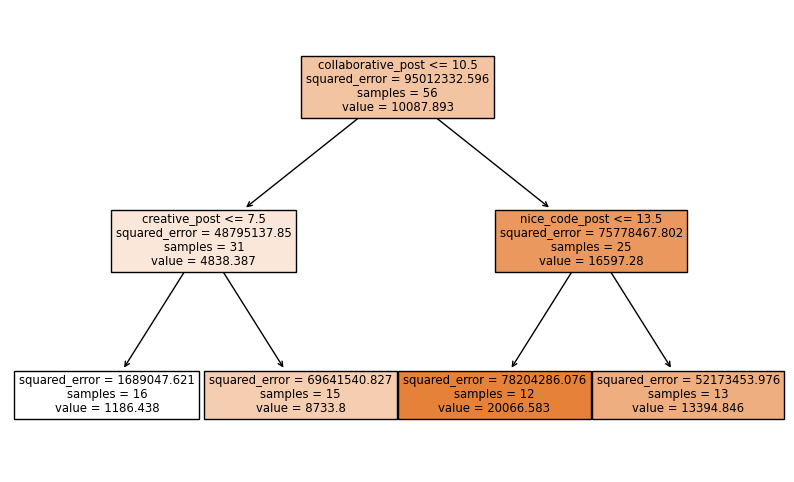

In [38]:
reg = DecisionTreeRegressor(max_depth = 2)
reg.fit(Xml_train, Yml_train)
plt.figure(figsize=(10, 6))
plot_tree(reg, filled=True, feature_names=Xml_train.columns)
plt.show()

In [117]:
#calculates R-squared

score = reg.score(Xml_test, Yml_test)
print(score)
#no we can't



0.24681417016232665


### Research Question 8 (Replace this header name!)

In [13]:
#can we make a model that predicts creativity level based on problem solving level?

In [ ]:
from sklearn.model_selection import train_test_split

In [49]:
from sklearn.model_selection import train_test_split
path ="C:\\Users\\Dell\\Downloads\\online_teaching_data.csv"
  
file=pd.read_csv(path,header=0)

file.fillna(0, inplace=True)
columns_to_convertfloat = ['Critical_problemSolving', 'Creativity', 'Self_Learning', 'Collaboration_selfDirection', 'Social']

# Replace commas with dots and convert to float, handling missing values
for column in columns_to_convertfloat:
    file[column] = file[column].replace({',': '.'}, regex=True).astype(float)
columnsml2 = ['Critical_problemSolving','Creativity']
file = file.loc[:, columnsml2]
file.head(10)
features2 = ['Critical_problemSolving']
Xml2 = file.loc[:, features2]
Yml2 = file.loc[:, ['Creativity']]
Xml2_train, Xml2_test, Yml2_train, Yml2_test = train_test_split(Xml2, Yml2, train_size = .80)
print("Training Set - Features (Xml_train):", Xml2_train.shape)
print("Training Set - Target Variable (Yml_train):", Yml2_train.shape)
print("\nTesting Set - Features (Xml_test):", Xml2_test.shape)
print("Testing Set - Target Variable (Yml_test):", Yml2_test.shape)

# Show the first few rows of features and target variable for training set
print("\nTraining Set:")
print("Features (Xml_train):")
print(Xml2_train)
print("\nTarget Variable (Yml_train):")
print(Yml2_train)

# Show the first few rows of features and target variable for testing set
print("\nTesting Set:")
print("Features (Xml_test):")
print(Xml2_test)
print("\nTarget Variable (Yml_test):")
print(Yml2_test)
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn import tree
from sklearn.model_selection import train_test_split


Training Set - Features (Xml_train): (56, 1)
Training Set - Target Variable (Yml_train): (56, 1)

Testing Set - Features (Xml_test): (15, 1)
Testing Set - Target Variable (Yml_test): (15, 1)

Training Set:
Features (Xml_train):
    Critical_problemSolving
38                      8.3
57                      1.0
59                      0.0
53                      7.0
48                      0.0
10                      5.2
17                      5.0
49                      1.3
19                      9.0
34                      8.0
5                       5.1
12                      8.7
66                     10.0
8                      10.0
51                      9.0
70                      8.0
58                      4.8
4                       8.7
42                      0.0
56                      0.0
27                      9.0
28                      0.0
30                      0.0
21                      9.3
23                     10.0
68                      0.0
65              

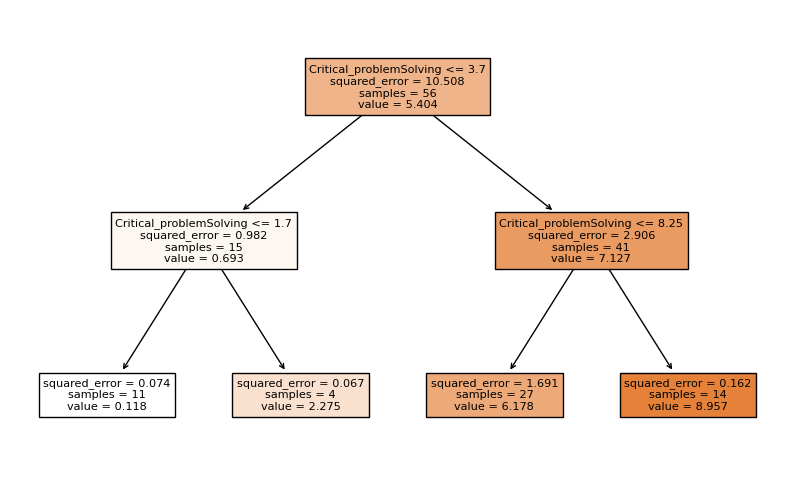

In [50]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn import tree
from sklearn.model_selection import train_test_split
reg2 = DecisionTreeRegressor(max_depth = 2)
reg2.fit(Xml2_train, Yml2_train)
plt.figure(figsize=(10, 6))
plot_tree(reg2, filled=True, feature_names=Xml2_train.columns)
plt.show()

In [122]:

score2 = reg2.score(Xml2_test, Yml2_test)
print(score2)
#yes we can 

0.9178012327126783


### Research Question 9 (Replace this header name!)

In [5]:
#can wecpredict the level of problem solving based on (creativity,self learning)

In [60]:
path ="C:\\Users\\Dell\\Downloads\\online_teaching_data.csv"
  
file=pd.read_csv(path,header=0)
columns_to_convertfloat = ['Critical_problemSolving', 'Creativity', 'Self_Learning', 'Collaboration_selfDirection', 'Social']

# Replace commas with dots and convert to float
for column in columns_to_convertfloat:
    file[column] = file[column].replace({',': '.'}, regex=True).astype(float)
features3 = ['Creativity','Self_Learning']
Xml3 = file.loc[:, features3]
Yml3 = file.loc[:, ['Critical_problemSolving']]
Xml3_train, Xml3_test, Yml3_train, Yml3_test = train_test_split(Xml3, Yml3, train_size = .80)
print("Training Set - Features (Xml_train):", Xml3_train.shape)
print("Training Set - Target Variable (Yml_train):", Yml3_train.shape)
print("\nTesting Set - Features (Xml_test):", Xml3_test.shape)
print("Testing Set - Target Variable (Yml_test):", Yml3_test.shape)

# Show the first few rows of features and target variable for training set
print("\nTraining Set:")
print("Features (Xml_train):")
print(Xml3_train)
print("\nTarget Variable (Yml_train):")
print(Yml3_train)

# Show the first few rows of features and target variable for testing set
print("\nTesting Set:")
print("Features (Xml_test):")
print(Xml3_test)
print("\nTarget Variable (Yml_test):")
print(Yml3_test)

Training Set - Features (Xml_train): (56, 2)
Training Set - Target Variable (Yml_train): (56, 1)

Testing Set - Features (Xml_test): (15, 2)
Testing Set - Target Variable (Yml_test): (15, 1)

Training Set:
Features (Xml_train):
    Creativity  Self_Learning
58         5.4            5.0
63         0.5            0.0
64         5.0            5.0
10         5.1            5.0
9          2.6            1.0
27         9.0           10.0
45         4.9            3.5
6          5.0            2.0
20         5.9            7.5
32         0.0            0.0
43         0.0            0.0
24         8.4            7.0
34         8.0            9.0
29         8.0            9.0
7          5.7            4.0
39         6.3            7.5
60         0.0            0.0
2          5.0            5.0
38         8.7            7.0
25         9.0            8.0
44         2.2            0.0
41         8.0            8.0
21         9.3            8.0
61         5.7            4.5
3          5.0        

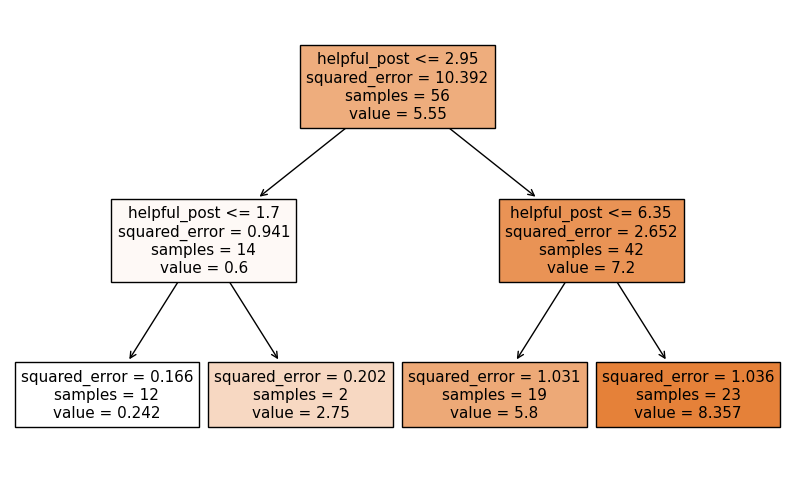

In [61]:
columns_to_convertfloat = ['Critical_problemSolving', 'Creativity', 'Self_Learning', 'Collaboration_selfDirection', 'Social']

# Replace commas with dots and convert to float
for column in columns_to_convertfloat:
    file[column] = file[column].replace({',': '.'}, regex=True).astype(float)
reg3 = DecisionTreeRegressor(max_depth = 2)
reg3.fit(Xml3_train, Yml3_train)
plt.figure(figsize=(10, 6))
plot_tree(reg3, filled=True, feature_names=Xml_train.columns)
plt.show()

In [74]:
score3 = reg3.score(Xml3_test, Yml3_test)
print(score3)
#average to high yes we can 

0.8876667692653399


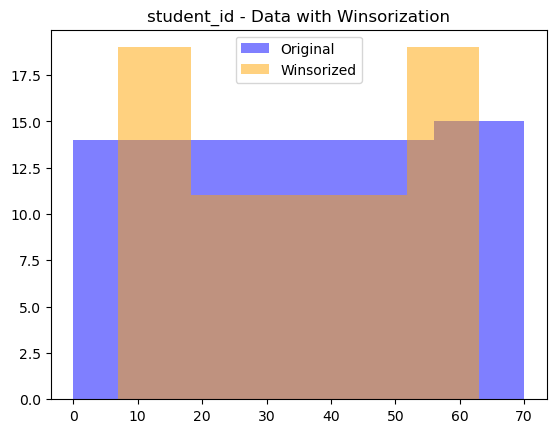

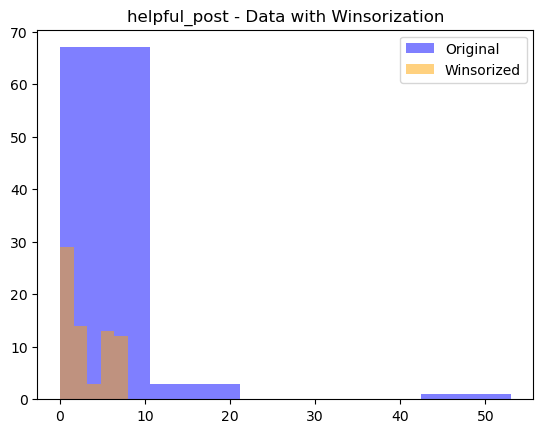

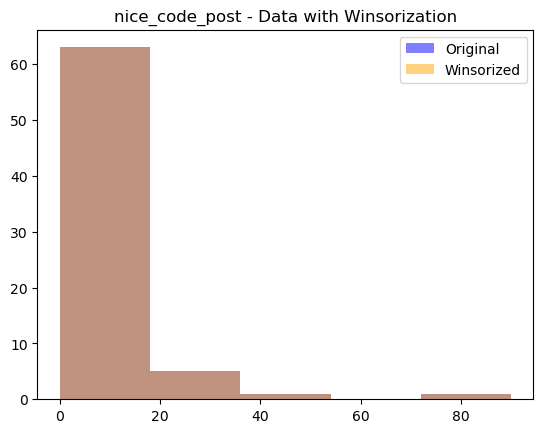

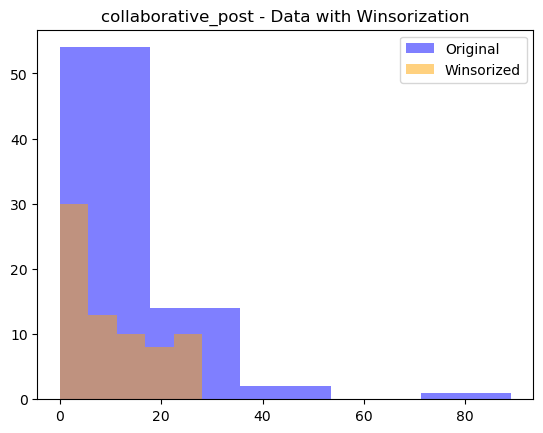

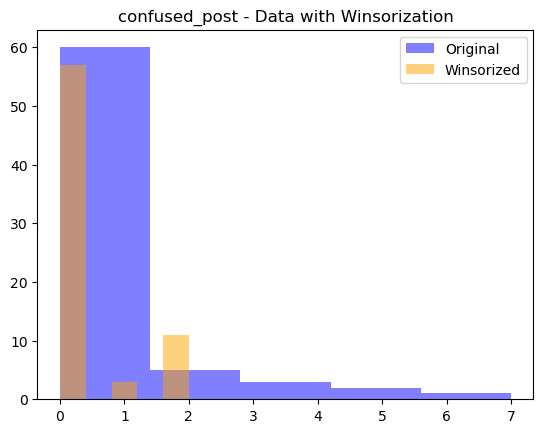

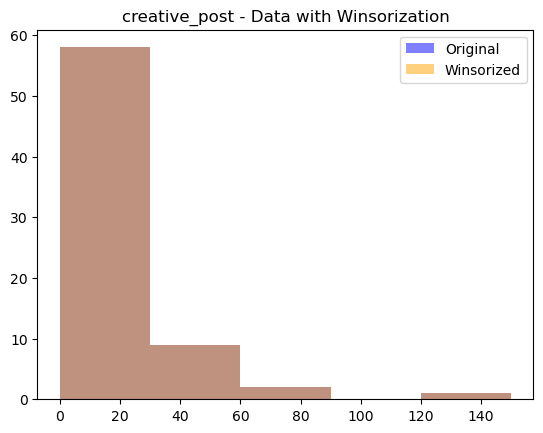

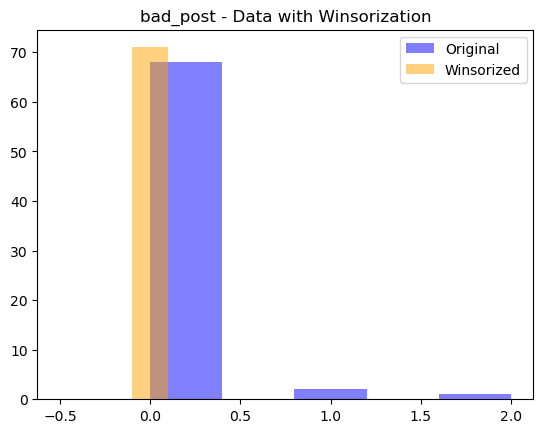

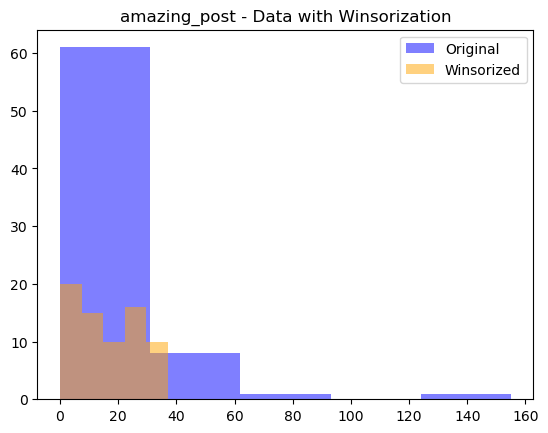

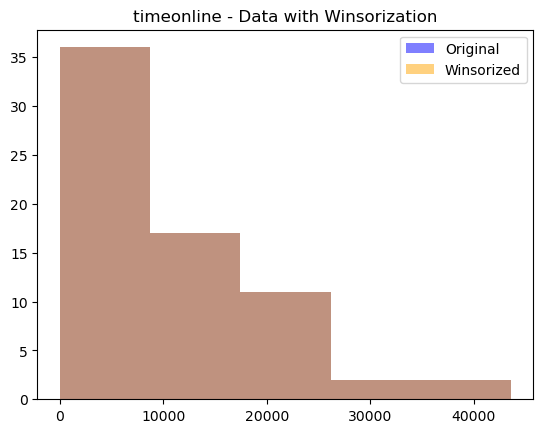

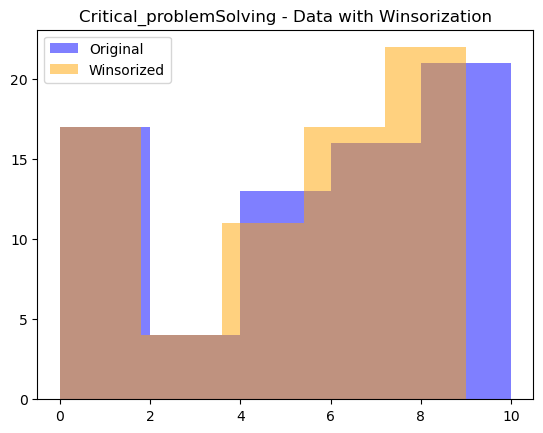

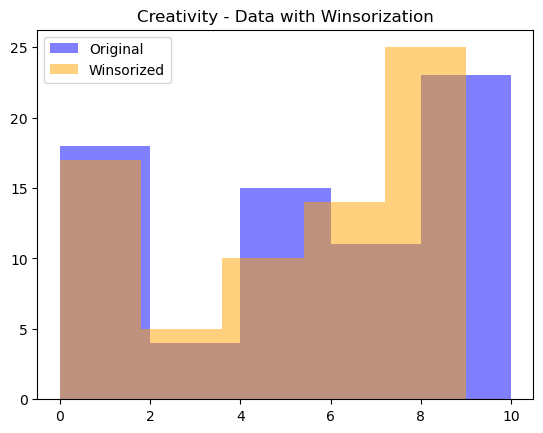

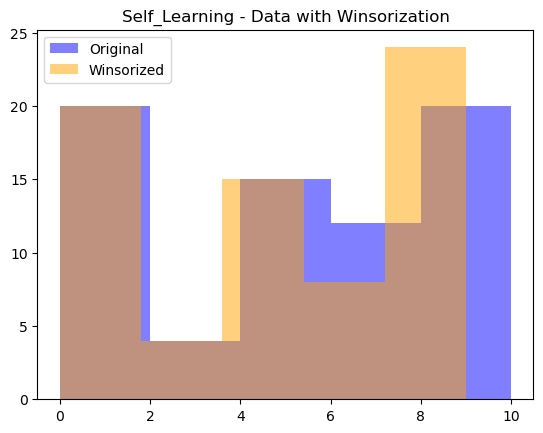

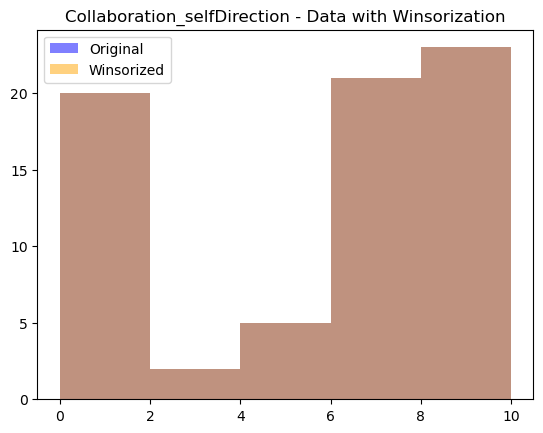

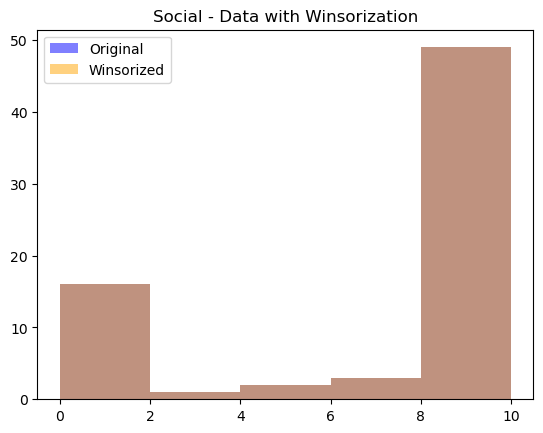

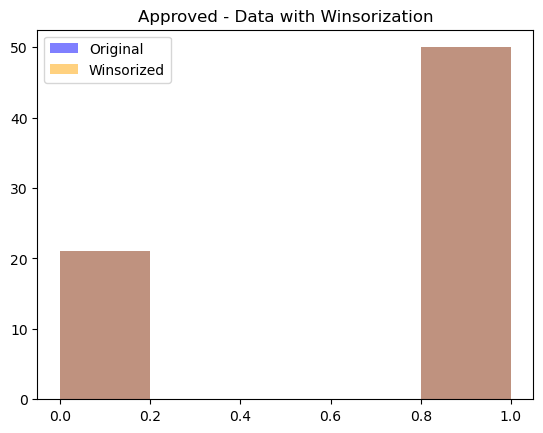

In [73]:

#optional dealing with outliers 

def winsorize_column(column, lower_percentile, upper_percentile):
    lower_threshold = np.percentile(column, lower_percentile * 100)
    upper_threshold = np.percentile(column, upper_percentile * 100)
    winsorized_data = np.clip(column, lower_threshold, upper_threshold)
    return winsorized_data
# Apply winsorization to each column
lower_percentile = 0.1
upper_percentile = 0.9
for column_name, column_data in file.items():
    winsorized_data = winsorize_column(column_data, lower_percentile, upper_percentile)
    
    # Plot original and winsorized data
    plt.hist(column_data, bins=5, color='blue', alpha=0.5, label='Original')
    plt.hist(winsorized_data, bins=5, color='orange', alpha=0.5, label='Winsorized')
    plt.title(f'{column_name} - Data with Winsorization')
    plt.legend()
    plt.show()

### Research Question 10 (Replace this header name!)

In [ ]:
#the regression model 

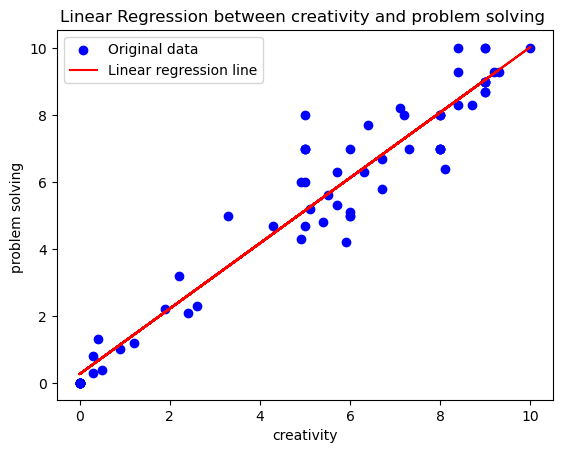

R-squared: 0.9337321569294135
Slope: 0.9770690983618336
Intercept: 0.263910927262498


In [128]:
# Create and fit the model
columns_to_convertfloat = ['Critical_problemSolving', 'Creativity', 'Self_Learning', 'Collaboration_selfDirection', 'Social']

# Replace commas with dots and convert to float
for column in columns_to_convertfloat:
    file[column] = file[column].replace({',': '.'}, regex=True).astype(float)
file.fillna(0)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
xregression=file['Creativity']
yregression=file['Critical_problemSolving']
X_reshaped = xregression.values.reshape(-1, 1)

model = LinearRegression()
model.fit(X_reshaped, yregression)

# Make predictions
y_pred = model.predict(X_reshaped)

# Plot the data and the linear regression line
plt.scatter(X_reshaped, yregression, color='blue', label='Original data')
plt.plot(X_reshaped, y_pred, color='red', label='Linear regression line')
plt.xlabel('creativity')
plt.ylabel('problem solving ')
plt.title('Linear Regression between creativity and problem solving ')
plt.legend()
plt.show()
# Calculate R-squared value
from sklearn.metrics import r2_score
r_squared = r2_score(yregression, y_pred)
print("R-squared:", r_squared)
from scipy import stats
from scipy.stats import linregress
slope, intercept, _, _, _ = linregress(xregression, yregression)

# Print slope and intercept
print("Slope:", slope)
print("Intercept:", intercept)

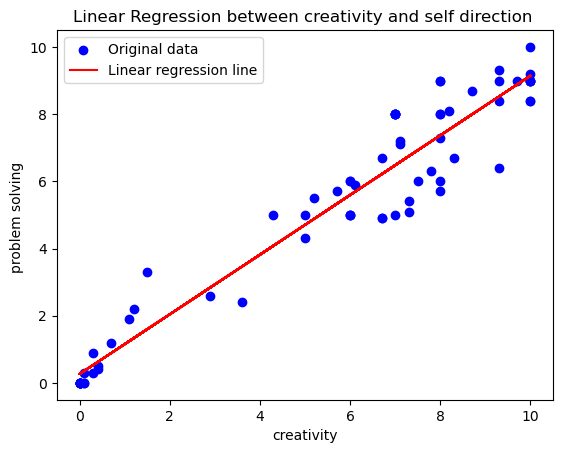

R-squared: 0.9298866497743136
Slope: 0.8877793768493167
Intercept: 0.2658488446395797


In [129]:
columns_to_convertfloat = ['Critical_problemSolving', 'Creativity', 'Self_Learning', 'Collaboration_selfDirection', 'Social']

# Replace commas with dots and convert to float
for column in columns_to_convertfloat:
    file[column] = file[column].replace({',': '.'}, regex=True).astype(float)
file.fillna(0)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
xregression2=file['Collaboration_selfDirection']
yregression2=file['Creativity']
X_reshaped2 = xregression2.values.reshape(-1, 1)

model = LinearRegression()
model.fit(X_reshaped2, yregression2)

# Make predictions
y_pred2 = model.predict(X_reshaped2)

# Plot the data and the linear regression line
plt.scatter(X_reshaped2, yregression2, color='blue', label='Original data')
plt.plot(X_reshaped2, y_pred2, color='red', label='Linear regression line')
plt.xlabel('creativity')
plt.ylabel('problem solving ')
plt.title('Linear Regression between creativity and self direction ')
plt.legend()
plt.show()
# Calculate R-squared value
from sklearn.metrics import r2_score
r_squared2 = r2_score(yregression2, y_pred2)
print("R-squared:", r_squared2)
from scipy.stats import linregress
slope2, intercept2, _, _, _ = linregress(xregression2, yregression2)

# Print slope and intercept
print("Slope:", slope2)
print("Intercept:", intercept2)

<a id='conclusions'></a>
## Conclusions

> Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration.  You must done more than one statistical test, and also statistical conclusions. And make sure you avoid implying causation from correlation!


## Submitting your Project 

> Before you submit your project, you need to create a HTML(File.html) and Notebook(File.ipynb) version of this notebook in the workspace here. 

> You can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project to "mahmoud_samy@alexu.edu.eg". The last step you must submit a zip file with .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
#What is link between the reactions and the skill levels shown by the student?
#no as the correlation between them is weak and their scatter plots are on one line ,also non logic the skills an dthe reactions the students react 

In [ ]:
#the conclusion is that we can improve the skills of the students based on their high other skilss

In [ ]:
#we can get info from the reactions to the posts means if there are alot of people that react to that type of posts they can 
#create more posts to high reach 

In [ ]:
#we can reduce the screen time to the students by spread awareness 